# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [5]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [6]:
#get data
yf.pdr_override()
appl = pdr.get_data_yahoo("AAPL", dt.datetime(2015,1,1), dt.datetime(2018,1,1))
appl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498684,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808516,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810755,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144636,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427483,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376476,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383575,85992800


In [7]:
#process data
appl = appl[["Adj Close"]].copy()
appl.columns = ["Close"]

#short and long EWM
short_EWM = 9
long_EWM = 26

appl["short_EWM"] = appl["Close"].ewm(span=short_EWM).mean()
appl["long_EWM"] = appl["Close"].ewm(span=long_EWM).mean()

#MACD and MACD signal line
signal = 9

appl["MACD"] = appl["short_EWM"] - appl["long_EWM"]
appl["MACD_signal"] = appl["MACD"].ewm(span = signal).mean()
appl.head()

#A bullish crossover arises when the MACD line turns upward and crosses beyond the MACD signal line
#A bearish crossover arises when the MACD line turns downward and crosses under the MACD signal line
#Here we don't short
appl1 = appl.copy()

#setting buy and sell
#when signal comes up we buy and sell lagged 1 day
appl1["position"] = np.where(appl1["MACD"] > appl1["MACD_signal"], 1, 0)
appl1["position"] = appl1["position"].shift(1)
appl1["buy_or_sell"] = appl1["position"].diff()
appl1

[*********************100%%**********************]  1 of 1 completed


,Close,short_EWM,long_EWM,MACD,MACD_signal,position,buy_or_sell
Date,,,,,,,
2015-01-02,24.498680,24.498680,24.498680,0.000000,0.000000,NaN,NaN
2015-01-05,23.808514,24.115254,24.140324,-0.025070,-0.013928,0.0,NaN
2015-01-06,23.810755,23.990459,24.021913,-0.031454,-0.021111,0.0,0.0
2015-01-07,24.144632,24.042686,24.056220,-0.013534,-0.018544,0.0,0.0
2015-01-08,25.072334,24.348983,24.291861,0.057122,0.003965,1.0,1.0
...,...,...,...,...,...,...,...
2017-12-22,41.427494,41.182670,40.708552,0.474118,0.416604,1.0,0.0
2017-12-26,40.376476,41.021431,40.683954,0.337477,0.400779,1.0,0.0
2017-12-27,40.383579,40.893861,40.661704,0.232157,0.367055,0.0,-1.0


In [8]:
#process data
appl = appl[["Close"]].copy()

#short and long EWM
short_EWM = 9
long_EWM = 26

appl["short_EWM"] = appl["Close"].ewm(span=short_EWM).mean()
appl["long_EWM"] = appl["Close"].ewm(span=long_EWM).mean()

#MACD and MACD signal line
signal = 9

appl["MACD"] = appl["short_EWM"] - appl["long_EWM"]
appl["MACD_signal"] = appl["MACD"].ewm(span = signal).mean()
appl.head()

,Close,short_EWM,long_EWM,MACD,MACD_signal
Date,,,,,
2015-01-02,24.498680,24.498680,24.498680,0.000000,0.000000
2015-01-05,23.808514,24.115254,24.140324,-0.025070,-0.013928
2015-01-06,23.810755,23.990459,24.021913,-0.031454,-0.021111
2015-01-07,24.144632,24.042686,24.056220,-0.013534,-0.018544
2015-01-08,25.072334,24.348983,24.291861,0.057122,0.003965


In [9]:
#A bullish crossover arises when the MACD line turns upward and crosses beyond the MACD signal line
#A bearish crossover arises when the MACD line turns downward and crosses under the MACD signal line
#Here we don't short
appl1 = appl.copy()

#setting buy and sell
#when signal comes up we buy and sell lagged 1 day
appl1["position"] = np.where(appl1["MACD"] > appl1["MACD_signal"], 1, 0)
appl1["position"] = appl1["position"].shift(1)
appl1["buy_or_sell"] = appl1["position"].diff()
appl1

,Close,short_EWM,long_EWM,MACD,MACD_signal,position,buy_or_sell
Date,,,,,,,
2015-01-02,24.498680,24.498680,24.498680,0.000000,0.000000,NaN,NaN
2015-01-05,23.808514,24.115254,24.140324,-0.025070,-0.013928,0.0,NaN
2015-01-06,23.810755,23.990459,24.021913,-0.031454,-0.021111,0.0,0.0
2015-01-07,24.144632,24.042686,24.056220,-0.013534,-0.018544,0.0,0.0
2015-01-08,25.072334,24.348983,24.291861,0.057122,0.003965,1.0,1.0
...,...,...,...,...,...,...,...
2017-12-22,41.427494,41.182670,40.708552,0.474118,0.416604,1.0,0.0
2017-12-26,40.376476,41.021431,40.683954,0.337477,0.400779,1.0,0.0
2017-12-27,40.383579,40.893861,40.661704,0.232157,0.367055,0.0,-1.0


### <font color = red> Answer 1 is presented in the cell below: </font>

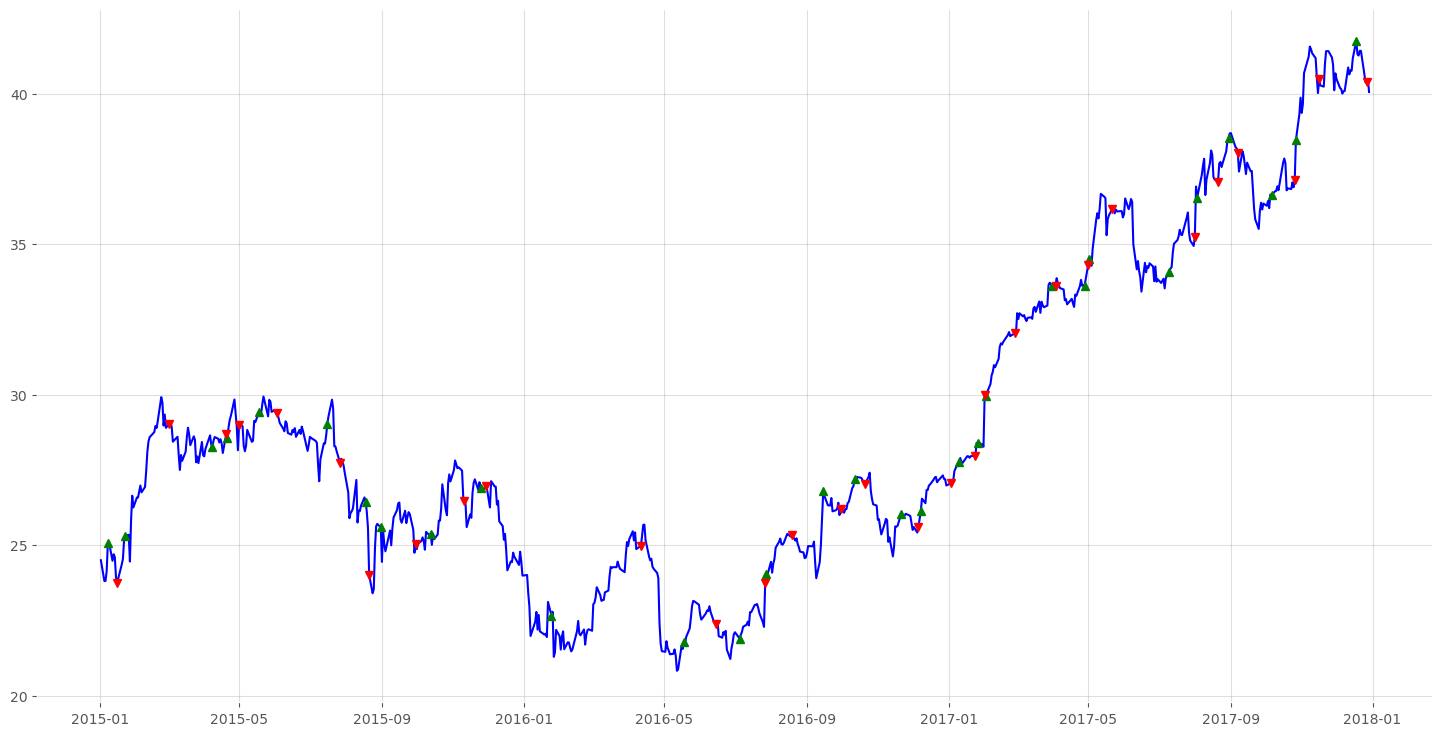

In [10]:
#visulize it
plt.figure(figsize=[18,9])
plt.plot(appl1["Close"], "b")
plt.plot(appl1.index[appl1.buy_or_sell == 1], appl1.Close[appl1.buy_or_sell == 1], "g^")
plt.plot(appl1.index[appl1.buy_or_sell == -1], appl1.Close[appl1.buy_or_sell == -1], "rv")
plt.show()

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [11]:
appl2 = appl1.copy()
appl2["log_return"] = np.log(appl2["Close"]/appl2["Close"].shift(1))

#when the signal appear buy it next day but get next-day return assuming buy it in open with last-day-close price
appl2["log_strategy"] = appl2["position"]*appl2["log_return"]
appl2.head(15)
#every time buy and sell you need to pay commision fee 5$
appl2["commission_fee"] = -abs(appl2["buy_or_sell"]*5)
appl2.head(12)

#begining you have 1e5
appl2.fillna(0, inplace=True)
investment = 1e5
appl2["money_left"] = investment
for i in range(len(appl2)):
    appl2["money_left"].iloc[i]= (
        np.exp(appl2["log_strategy"].iloc[i])
        *
        (
            appl2["money_left"].iloc[i-1]
            +
            appl2["commission_fee"].iloc[i]
        )
    )
appl2.tail(5)

,Close,short_EWM,long_EWM,MACD,MACD_signal,position,buy_or_sell,log_return,log_strategy,commission_fee,money_left
Date,,,,,,,,,,,
2017-12-22,41.427494,41.182670,40.708552,0.474118,0.416604,1.0,0.0,0.000000,0.000000,-0.0,167189.471154
2017-12-26,40.376476,41.021431,40.683954,0.337477,0.400779,1.0,0.0,-0.025697,-0.025697,-0.0,162947.865242
2017-12-27,40.383579,40.893861,40.661704,0.232157,0.367055,0.0,-1.0,0.000176,0.000000,-5.0,162942.865242
2017-12-28,40.497200,40.814529,40.649518,0.165010,0.326646,0.0,0.0,0.002810,0.000000,-0.0,162942.865242
2017-12-29,40.059265,40.663476,40.605796,0.057680,0.272853,0.0,0.0,-0.010873,-0.000000,-0.0,162942.865242


In [12]:
(appl2["money_left"].iloc[-1]/investment-1)*100

62.942865242272816

### <font color = red> Answer 2 </font>

    The answer is ____62.94________ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [10]:
# plt.figure(figsize=(19,8))
# plt.plot(appl3[["max_performace_return","cumulative_return"]])

In [11]:
appl3 = appl2.copy()
appl3["strategy_log_return"] = np.log(appl3["money_left"]/appl3["money_left"].shift(1))
appl3["cumulative_return"] = np.exp(appl3["strategy_log_return"].cumsum())
appl3["max_performace_return"] = appl3["cumulative_return"].cummax()
appl3.tail(12)

,Close,short_EWM,long_EWM,MACD,MACD_signal,position,buy_or_sell,log_return,log_strategy,commission_fee,money_left,strategy_log_return,cumulative_return,max_performace_return
Date,,,,,,,,,,,,,,
2017-12-13,40.778893,40.521426,40.266531,0.254895,0.337627,0.0,0.0,0.003314,0.000000,-0.0,166201.130568,0.000000,1.662011,1.726239
2017-12-14,40.767059,40.570552,40.303607,0.266945,0.323491,0.0,0.0,-0.000290,-0.000000,-0.0,166201.130568,0.000000,1.662011,1.726239
2017-12-15,41.181309,40.692704,40.368622,0.324081,0.323609,0.0,0.0,0.010110,0.000000,-0.0,166201.130568,0.000000,1.662011,1.726239
2017-12-18,41.761269,40.906417,40.471781,0.434635,0.345814,1.0,1.0,0.013985,0.013985,-5.0,168536.684793,0.013955,1.685367,1.726239
2017-12-19,41.316238,40.988381,40.534334,0.454047,0.367461,1.0,0.0,-0.010714,-0.010714,-0.0,166740.668553,-0.010714,1.667407,1.726239
2017-12-20,41.271259,41.044957,40.588921,0.456036,0.385176,1.0,0.0,-0.001089,-0.001089,-0.0,166559.145628,-0.001089,1.665591,1.726239
2017-12-21,41.427490,41.121463,40.651037,0.470426,0.402226,1.0,0.0,0.003778,0.003778,-0.0,167189.649521,0.003778,1.671896,1.726239
2017-12-22,41.427490,41.182669,40.708552,0.474117,0.416604,1.0,0.0,0.000000,0.000000,-0.0,167189.649521,0.000000,1.671896,1.726239
2017-12-26,40.376476,41.021430,40.683954,0.337476,0.400779,1.0,0.0,-0.025697,-0.025697,-0.0,162948.054088,-0.025697,1.629481,1.726239


In [12]:
appl4 = appl3.copy()

appl4["drawdown"] = (
    -(
        appl3["cumulative_return"] 
        -
        appl3["max_performace_return"]
    )
    /
    appl3["cumulative_return"])



appl4.head(12)

,Close,short_EWM,long_EWM,MACD,MACD_signal,position,buy_or_sell,log_return,log_strategy,commission_fee,money_left,strategy_log_return,cumulative_return,max_performace_return,drawdown
Date,,,,,,,,,,,,,,,
2015-01-02,24.498684,24.498684,24.498684,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,100000.000000,NaN,NaN,NaN,NaN
2015-01-05,23.808519,24.115259,24.140329,-0.025070,-0.013928,0.0,0.0,-0.028576,-0.000000,0.0,100000.000000,0.000000,1.000000,1.000000,-0.000000
2015-01-06,23.810760,23.990465,24.021918,-0.031454,-0.021111,0.0,0.0,0.000094,0.000000,-0.0,100000.000000,0.000000,1.000000,1.000000,-0.000000
2015-01-07,24.144634,24.042690,24.056224,-0.013534,-0.018544,0.0,0.0,0.013925,0.000000,-0.0,100000.000000,0.000000,1.000000,1.000000,-0.000000
2015-01-08,25.072327,24.348984,24.291863,0.057121,0.003965,1.0,1.0,0.037703,0.037703,-5.0,103837.038025,0.037653,1.038370,1.038370,-0.000000
2015-01-09,25.099222,24.552340,24.453570,0.098770,0.029662,1.0,0.0,0.001072,0.001072,-0.0,103948.425831,0.001072,1.039484,1.039484,-0.000000
2015-01-12,24.480753,24.534223,24.458405,0.075819,0.041343,1.0,0.0,-0.024950,-0.024950,-0.0,101387.035550,-0.024950,1.013870,1.039484,0.025263
2015-01-13,24.698114,24.573609,24.497028,0.076582,0.049812,1.0,0.0,0.008840,0.008840,-0.0,102287.237972,0.008840,1.022872,1.039484,0.016240
2015-01-14,24.603998,24.580629,24.512883,0.067746,0.053955,1.0,0.0,-0.003818,-0.003818,-0.0,101897.455695,-0.003818,1.018975,1.039484,0.020128


In [13]:
lst_day = []
lst_drawdown = []

for i in range(len(appl4[appl4["drawdown"]==0].index)-1):
    days = (appl4[appl4["drawdown"]==0].index[i+1]-appl4[appl4["drawdown"]==0].index[i]).days
    
    max_drawdown = appl4.loc[appl4[appl4["drawdown"]==0].index[i]:appl4[appl4["drawdown"]==0].index[i+1]]["drawdown"].max()
    
    lst_day.append(days)
    lst_drawdown.append(max_drawdown)
    

In [14]:
drawdown = pd.DataFrame([lst_day,lst_drawdown]).T
drawdown.columns = ["days", "drawdown"]
drawdown.loc[drawdown["drawdown"].nlargest(5).index]

,days,drawdown
15,456.0,0.213151
4,20.0,0.080017
57,20.0,0.042283
18,53.0,0.040119
49,62.0,0.038935


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown _____21.31_______ % | Duration ________456____ Days
    
    The 2nd worst drawdown period : Net drawdown _____8_______ % | Duration ____20________ Days
     
    The 3rd worst drawdown period : Net drawdown ______4.23______ % | Duration _____20_______ Days
         
    The 4th worst drawdown period : Net drawdown ______4.01______ % | Duration _____53_______ Days
    
    The 5th worst drawdown period : Net drawdown ______3.89______ % | Duration _____62_______ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [15]:
lst = []

In [16]:
year_2015 = appl4.loc[dt.datetime(2015,1,1):dt.datetime(2016,1,1)].copy()

lst.append(
    (
        year_2015["money_left"].iloc[-1] 
        -
        year_2015["money_left"].iloc[0]
    )
    /
    year_2015["money_left"].iloc[0])

In [17]:
year_2016 = appl4.loc[dt.datetime(2016,1,1):dt.datetime(2017,1,1)].copy()
lst.append(
    (
        year_2016["money_left"].iloc[-1] 
        -
        year_2016["money_left"].iloc[0]
    )
    /
    year_2016["money_left"].iloc[0])

In [18]:
year_2017 = appl4.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)].copy()
lst.append(
    (
        year_2017["money_left"].iloc[-1] 
        -
        year_2017["money_left"].iloc[0]
    )
    /
    year_2017["money_left"].iloc[0])

In [19]:
lst

[0.05379280217268155, 0.25912874791094415, 0.22808054222124732]

In [20]:
np.mean(lst)

0.18033403076829102

### <font color = red> Answer 4 </font>

    Below average year(s) : ___2015_________ 
    
    Above average year(s) : ____2016、2017________ 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [21]:
appl5 = appl4.copy()
appl5["strategy_log_return"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(appl5["strategy_log_return"].apply(np.exp)-1)
    /
    np.std(appl5["strategy_log_return"].apply(np.exp)-1)
)

1.1558957576578215

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: ____1.16______
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

In [22]:
#def q6(ticks)
ticks = ["MSFT", "AMZN", "UAL", "DAL", "XOM", "CVX"]

In [23]:
def q6(ticks):
    lst = []
    for tick in ticks:
        #get data
        stock = pdr.get_data_yahoo(tick, dt.datetime(2015,1,1), dt.datetime(2018,1,1))

        #process data
        stock = stock[["Close"]].copy()

        #short and long EWM
        short_EWM = 9
        long_EWM = 26

        stock["short_EWM"] = stock["Close"].ewm(span=short_EWM).mean()
        stock["long_EWM"] = stock["Close"].ewm(span=long_EWM).mean()

        #MACD and MACD signal line
        signal = 9

        stock["MACD"] = stock["short_EWM"] - stock["long_EWM"]
        stock["MACD_signal"] = stock["MACD"].ewm(span = signal).mean()

        #A bullish crossover arises when the MACD line turns upward and crosses beyond the MACD signal line
        #A bearish crossover arises when the MACD line turns downward and crosses under the MACD signal line
        #Here we don't short
        stock1 = stock.copy()

        #setting buy and sell
        #when signal comes up we buy and sell lagged 1 day
        stock1["position"] = np.where(stock1["MACD"] > stock1["MACD_signal"], 1, 0)
        stock1["position"] = stock1["position"].shift(1)
        stock1["buy_or_sell"] = stock1["position"].diff()
        lst.append(stock1)
        
    return lst

In [24]:
stocks = q6(ticks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [25]:
def q6_visualize(stocks):
    i = 0
    for stock in stocks:
        plt.figure(figsize=[18,9])
        plt.plot(stock["Close"], "b")
        plt.plot(stock.index[stock.buy_or_sell == 1], stock.Close[stock.buy_or_sell == 1], "g^")
        plt.plot(stock.index[stock.buy_or_sell == -1], stock.Close[stock.buy_or_sell == -1], "rv")
        plt.title(ticks[i])
        i +=1
        plt.show()

### <font color = red> Answer 6 is presented in the cell below: </font>

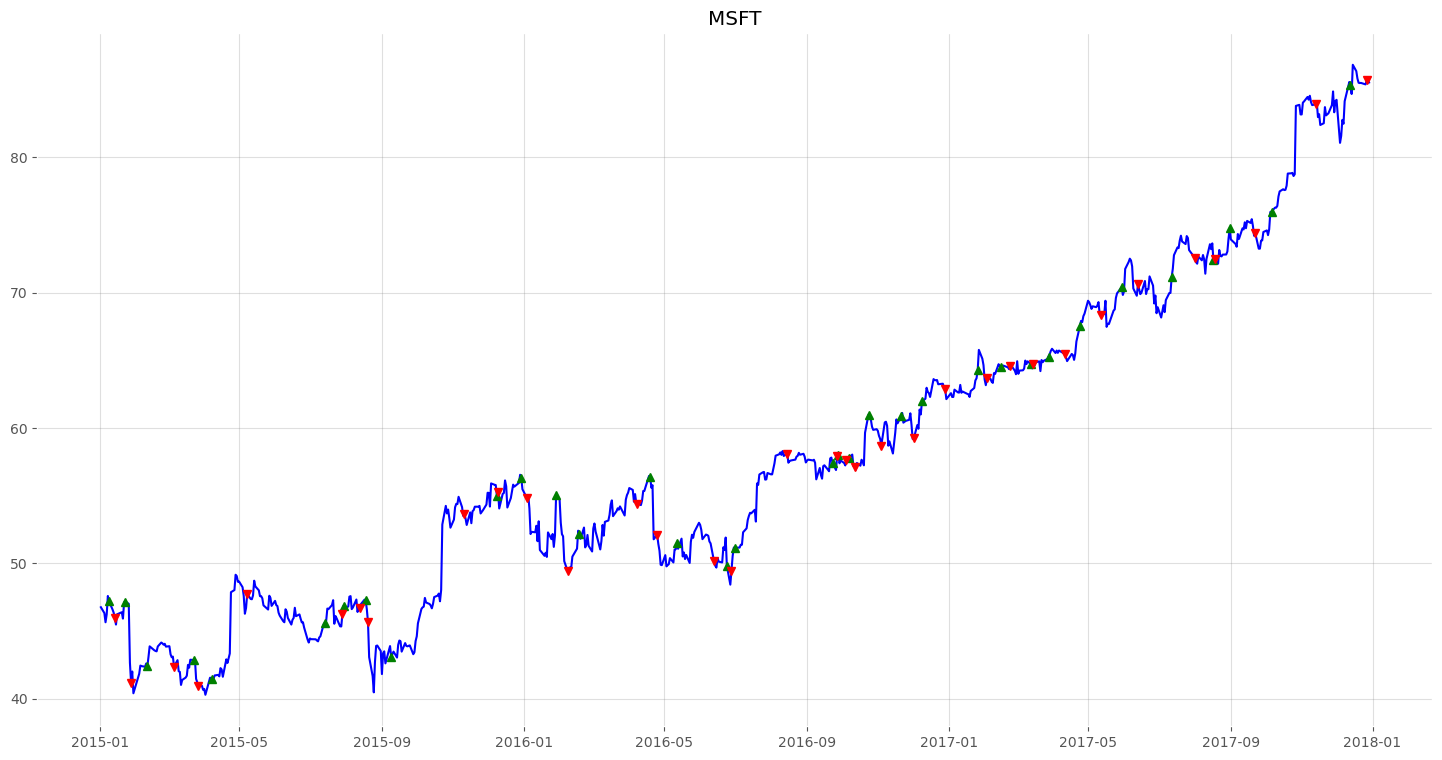

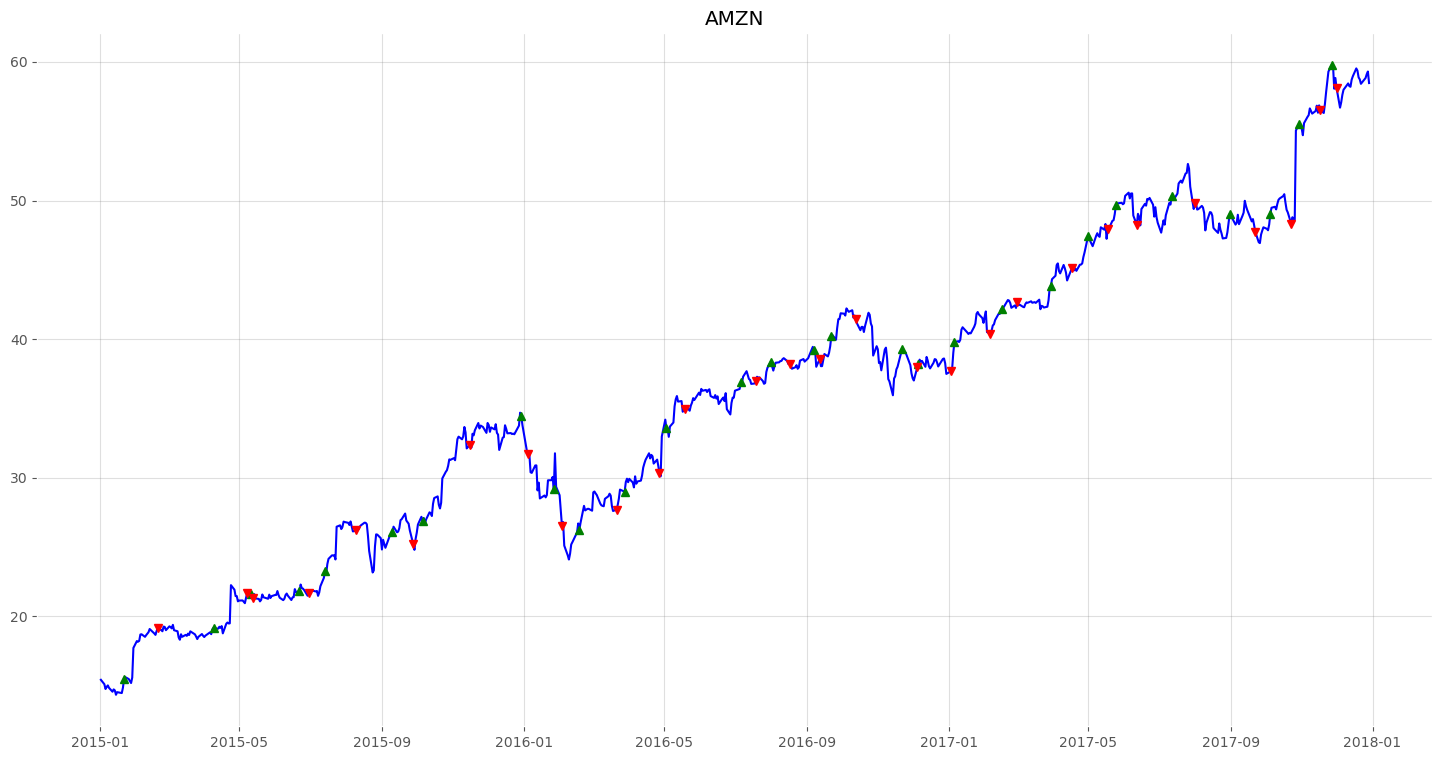

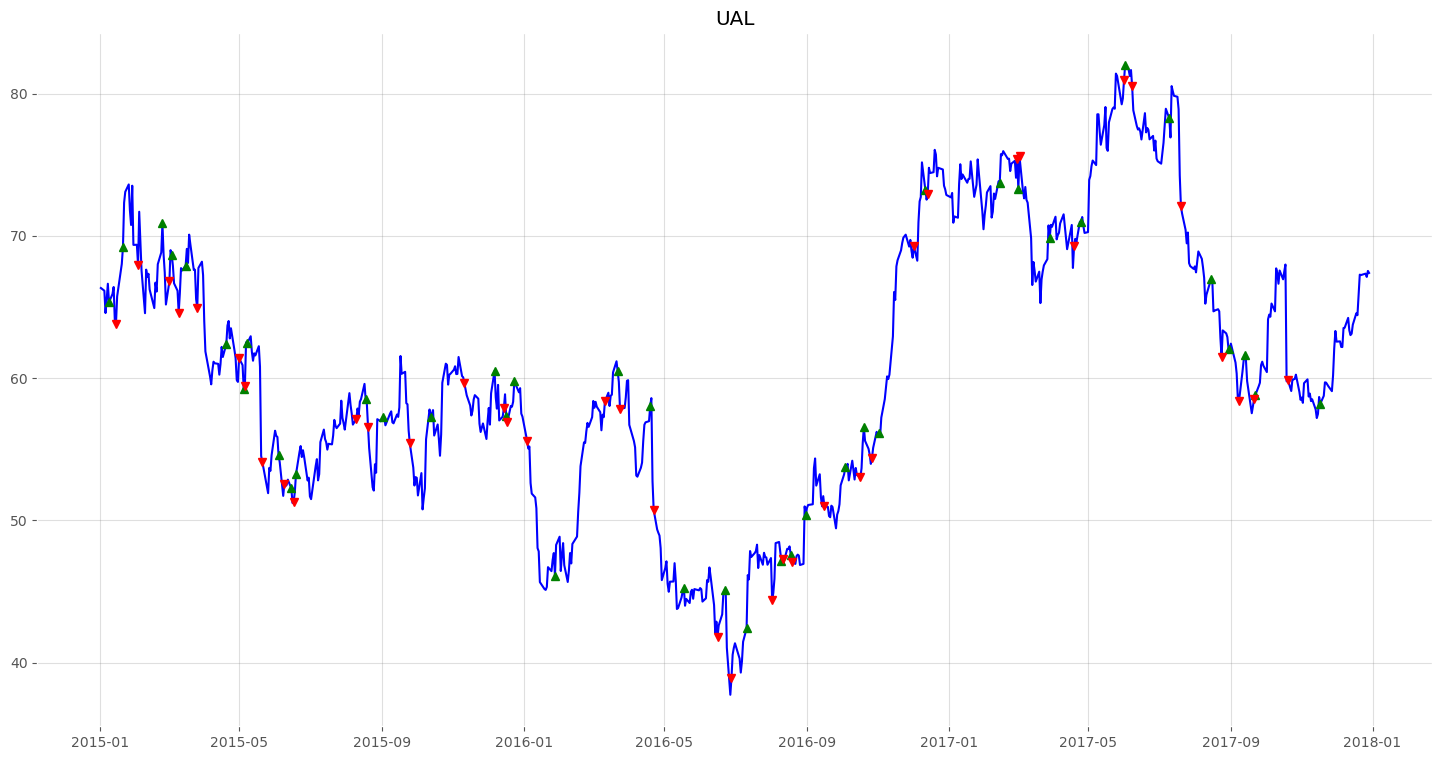

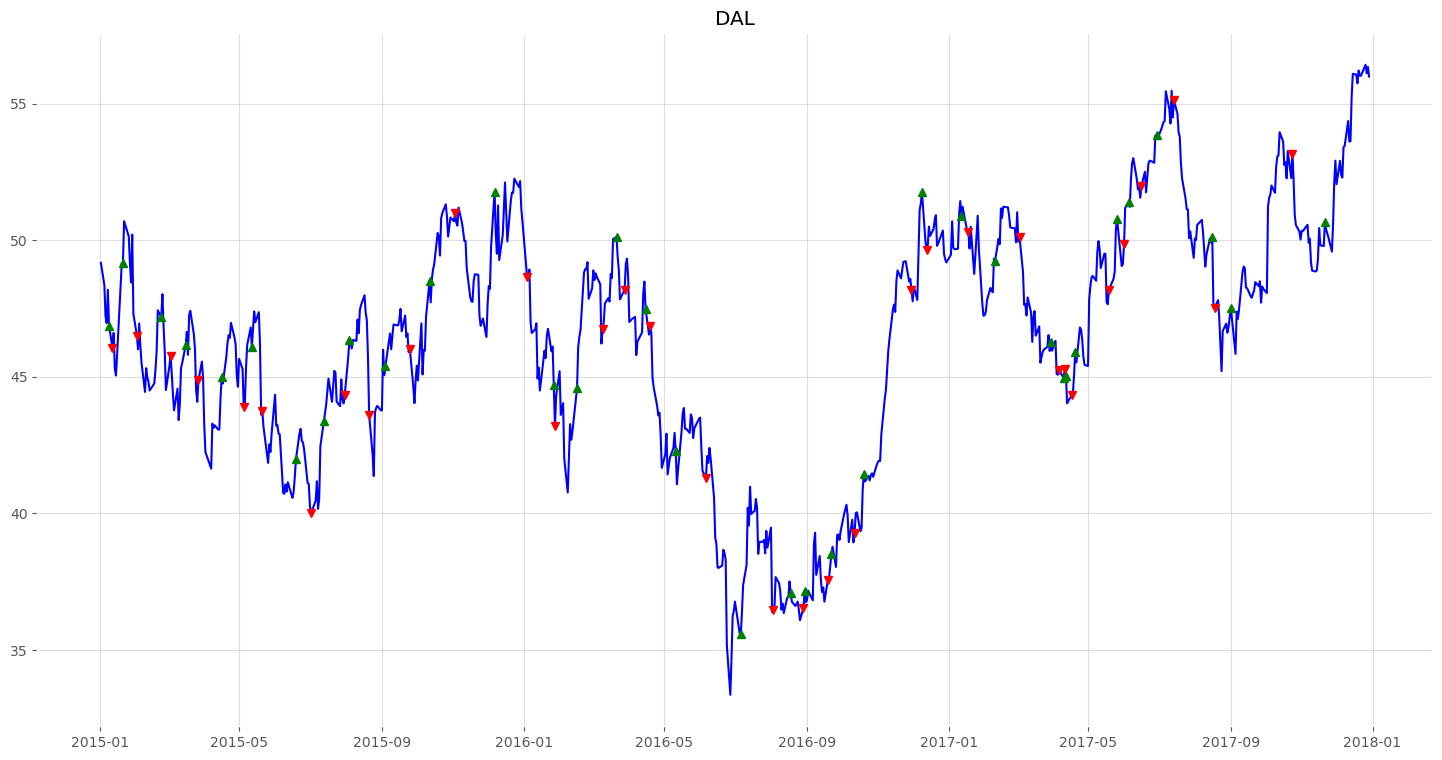

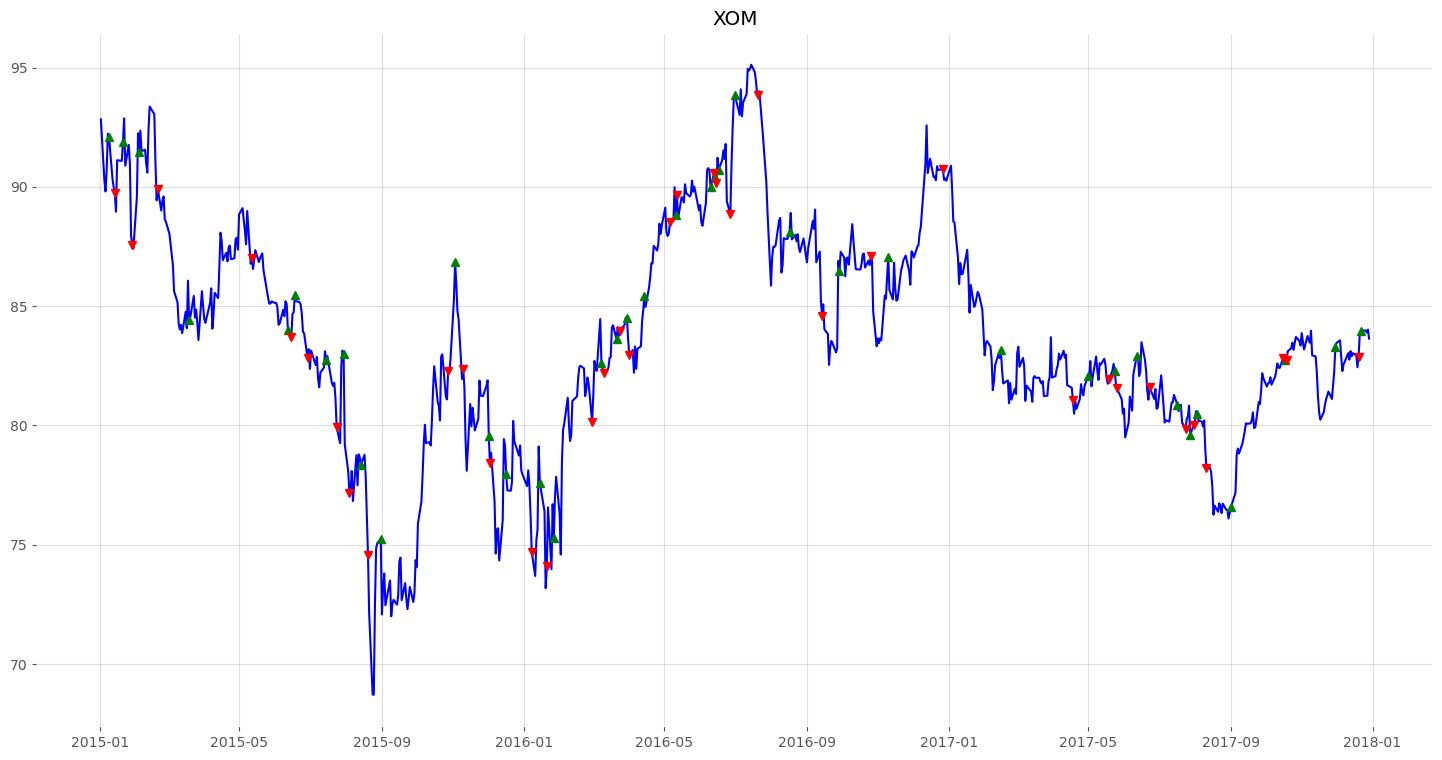

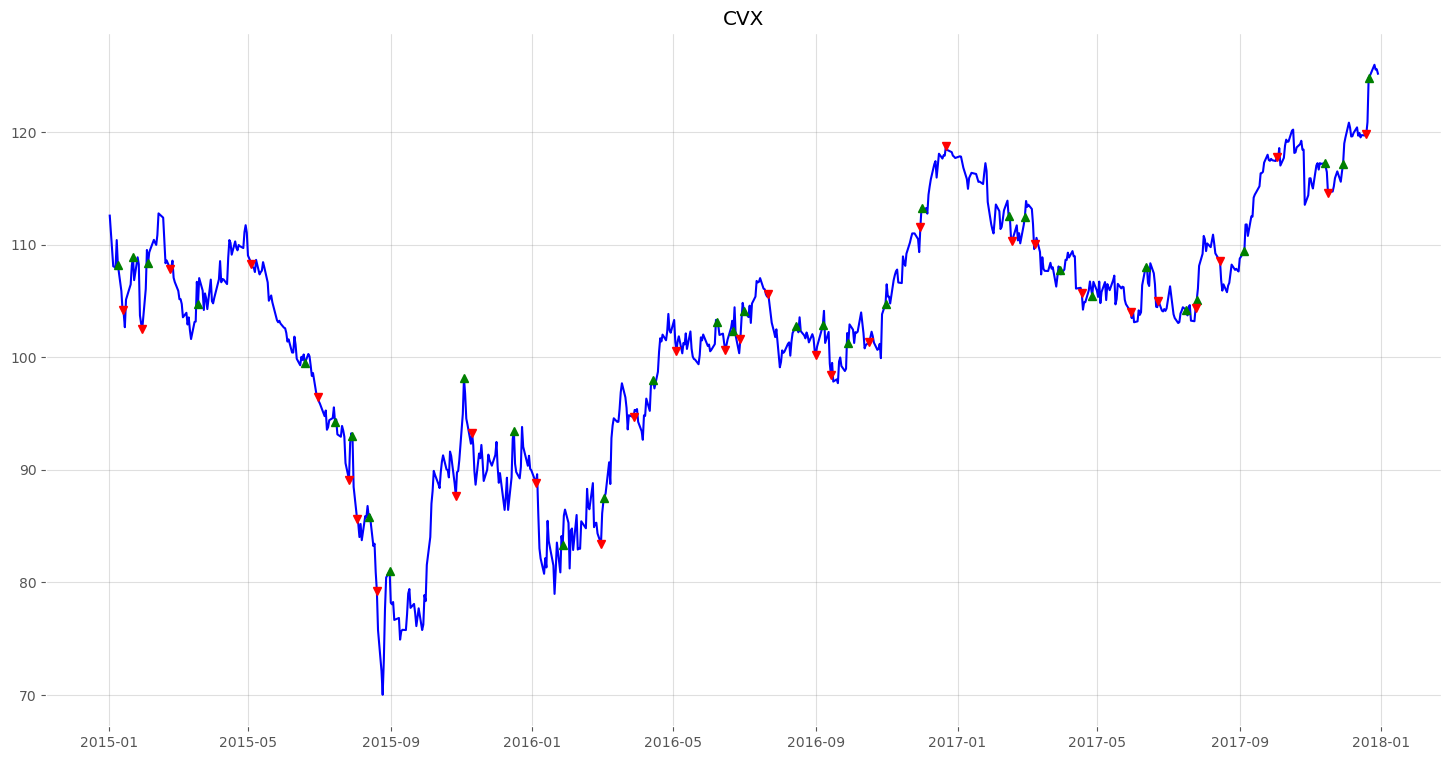

In [26]:
q6_visualize(stocks)

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [27]:
def q7(stocks):
    lst = []
    for stock in stocks:
        stock["log_return"] = np.log(stock["Close"]/stock["Close"].shift(1))

        #when the signal appear buy it next day but get next-day return assuming buy it in open with last-day-close price
        stock["log_strategy"] = stock["position"]*stock["log_return"]
        
        #every time buy and sell you need to pay commision fee 5$
        stock["commission_fee"] = -abs(stock["buy_or_sell"]*5)

        #begining you have 1e5
        stock.fillna(0, inplace=True)
        investment = 1e5
        stock["money_left"] = investment
        for i in range(len(stock)):
            stock["money_left"].iloc[i]= (
                np.exp(stock["log_strategy"].iloc[i])
                *
                (
                    stock["money_left"].iloc[i-1]
                    +
                    stock["commission_fee"].iloc[i]
                )
            )

        stock1 = stock.copy()
        stock1["strategy_log_return"] = np.log(stock1["money_left"]/stock1["money_left"].shift(1))
        stock1["cumulative_return"] = np.exp(stock1["strategy_log_return"].cumsum())
        lst.append(stock1)
    return lst

In [28]:
stocks1 = q7(stocks)
lst = []
for stock in stocks1:
    lst.append(np.max(stock["cumulative_return"]))
    
ticks[lst.index(max(lst))]

'AMZN'

### <font color = red> Answer 7 </font>

    The answer is ____________AMZN______________________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [29]:
def q8(stocks):
    stocks_drawdown = []
    for stock in stocks:
        stock1 = stock
        #stock1 = stock.copy()
        stock1["max_performace_return"] = stock1["cumulative_return"].cummax()

        stock1["drawdown"] = (
            -(
                stock1["cumulative_return"] 
                -
                stock1["max_performace_return"]
            )
            /
            stock1["cumulative_return"])

        lst_day = []
        lst_drawdown = []

        for i in range(len(stock1[stock1["drawdown"]==0].index)-1):
            days = (stock1[stock1["drawdown"]==0].index[i+1]-stock1[stock1["drawdown"]==0].index[i]).days

            max_drawdown = np.max(stock1.loc[stock1[stock1["drawdown"]==0].index[i]:stock1[stock1["drawdown"]==0].index[i+1]]["drawdown"])

            lst_day.append(days)
            lst_drawdown.append(max_drawdown)
        
        days = (stock1.iloc[-1].name-stock1[stock1["drawdown"]==0].index[-1]).days
        max_drawdown = stock1.loc[stock1[stock1["drawdown"]==0].index[-1]:stock1.iloc[-1].name]["drawdown"].max()
        lst_day.append(days)
        lst_drawdown.append(max_drawdown)

        drawdown = pd.DataFrame([lst_day,lst_drawdown]).T
        drawdown.columns = ["days", "drawdown"]
        
        
        stocks_drawdown.append(drawdown)
        
    return stocks_drawdown

In [30]:
drawdowns = q8(stocks1)

In [31]:
lst_drawdown = []
for drawdown in drawdowns:
    lst_drawdown.append(drawdown["drawdown"].max())
    
ticks[lst_drawdown.index(max(lst_drawdown))]

'UAL'

### <font color = red> Answer 8 </font>

    The answer is _____________UAL_____________________________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [32]:
def q9(stocks):
    stocks_annual_return = []
    for stock in stocks:
        lst = []
        year_2015 = stock.loc[dt.datetime(2015,1,1):dt.datetime(2016,1,1)].copy()

        lst.append(
            (
                year_2015["money_left"].iloc[-1] 
                -
                year_2015["money_left"].iloc[0]
            )
            /
            year_2015["money_left"].iloc[0])

        year_2016 = stock.loc[dt.datetime(2016,1,1):dt.datetime(2017,1,1)].copy()
        lst.append(
            (
                year_2016["money_left"].iloc[-1] 
                -
                year_2016["money_left"].iloc[0]
            )
            /
            year_2016["money_left"].iloc[0])

        year_2017 = stock.loc[dt.datetime(2017,1,1):dt.datetime(2018,1,1)].copy()
        lst.append(
            (
                year_2017["money_left"].iloc[-1] 
                -
                year_2017["money_left"].iloc[0]
            )
            /
            year_2017["money_left"].iloc[0])

        stocks_annual_return.append(lst)
        
    return stocks_annual_return


In [33]:
stocks_annual_return = q9(stocks1)
max_return = max(max(stocks_annual_return) for stocks_annual_return in stocks_annual_return)
max_return, stocks_annual_return

(0.876795289488539,
 [[0.12433956215980725, -0.05467091102727871, 0.14408675365968399],
  [0.876795289488539, -0.005918896399576738, 0.10915662601730404],
  [-0.3535425116771141, 0.12271853618508753, -0.031587208718069935],
  [-0.06926066288743227, 0.08213474121067545, 0.17159702637276888],
  [-0.2069897890694742, -0.05837845963088709, -0.014540306372327772],
  [-0.2219972911037995, 0.14111783133863598, 0.06508749855749353]])

In [34]:
ticks[1]

'AMZN'

### <font color = red> Answer 9 </font>

    The answer is _______year 2015, amzn ___________________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [35]:
for stock in stocks1:
    stock["strategy_log_return"].fillna(0, inplace=True)

    sharpe_ratio = (
        253**0.5
        *
        np.mean(stock["strategy_log_return"].apply(np.exp)-1)
        /
        np.std(stock["strategy_log_return"].apply(np.exp)-1)
    )
    print(sharpe_ratio)

0.46786527523471516
1.1821075587599834
-0.3168330279521091
0.37618921589512005
-0.7570460381217254
-0.03922904791316112


### <font color = red> Answer 10 </font>

    MSFT ______0.4679______
    
    AMZN ____1.1821________

    UAL  ______-0.3168______

    DAL  _____0.3762_______

    XOM  ____-0.757________
    
    CVX  ______-0.0392______

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>